In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df= pd.read_csv("E:\\frauddetctncsv.csv")
df

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0       1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1       1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2       1  TRANSFER    181.00  C1305486145         181.00            0.00   
3       1  CASH_OUT    181.00   C840083671         181.00            0.00   
4       1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
..    ...       ...       ...          ...            ...             ...   
245     1   PAYMENT   3199.06   C832292933     6299171.25      6295972.18   
246     1   PAYMENT  10265.17   C792855998     6295972.18      6285707.02   
247     1   PAYMENT   9029.12  C1003755748       25480.00        16450.88   
248     1   PAYMENT   7600.57  C1805164661       50747.00        43146.43   
249     1   PAYMENT   2057.71   C896138248       25132.00        23074.29   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0    M1979787155             0.0             0.0        0               0  
1    M2044282225             0.0             0.0        0               0  
2     C553264065             0.0             0.0        1               0  
3      C38997010         21182.0             0.0        1               0  
4    M1230701703             0.0             0.0        0               0  
..           ...             ...             ...      ...             ...  
245  M1280603381             0.0             0.0        0               0  
246  M1424108509             0.0             0.0        0               0  
247  M1414013111             0.0             0.0        0               0  
248   M778162712             0.0             0.0        0               0  
249   M548482954             0.0             0.0        0               0  

[250 rows x 11 columns]

In [3]:
#Show first row only 
df.iloc[0,:]

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg        170136.0
newbalanceOrig      160296.36
nameDest          M1979787155
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object

In [4]:
#Display the first few rows of the DataFrame
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [5]:
# Display the last few rows of the DataFrame
df.tail(3)

step     type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
247     1  PAYMENT  9029.12  C1003755748        25480.0        16450.88   
248     1  PAYMENT  7600.57  C1805164661        50747.0        43146.43   
249     1  PAYMENT  2057.71   C896138248        25132.0        23074.29   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
247  M1414013111             0.0             0.0        0               0  
248   M778162712             0.0             0.0        0               0  
249   M548482954             0.0             0.0        0               0

In [6]:
# Get the data types and non-null counts of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            250 non-null    int64  
 1   type            250 non-null    object 
 2   amount          250 non-null    float64
 3   nameOrig        250 non-null    object 
 4   oldbalanceOrg   250 non-null    float64
 5   newbalanceOrig  250 non-null    float64
 6   nameDest        250 non-null    object 
 7   oldbalanceDest  250 non-null    float64
 8   newbalanceDest  250 non-null    float64
 9   isFraud         250 non-null    int64  
 10  isFlaggedFraud  250 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 21.6+ KB


In [7]:
# Get summary statistics of numerical columns
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  250.0  2.500000e+02   2.500000e+02    2.500000e+02    2.500000e+02   
mean     1.0  1.005947e+05   1.899107e+05    1.845856e+05    3.017977e+05   
std      0.0  2.111660e+05   9.659651e+05    9.658958e+05    8.722352e+05   
min      1.0  8.730000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%      1.0  3.951363e+03   0.000000e+00    0.000000e+00    0.000000e+00   
50%      1.0  1.009285e+04   2.021605e+03    0.000000e+00    1.233800e+04   
75%      1.0  1.093404e+05   3.924041e+04    2.643482e+04    2.530912e+05   
max      1.0  1.724887e+06   6.313782e+06    6.309147e+06    6.093091e+06   

       newbalanceDest     isFraud  isFlaggedFraud  
count    2.500000e+02  250.000000           250.0  
mean     1.157222e+06    0.008000             0.0  
std      3.706540e+06    0.089263             0.0  
min      0.000000e+00    0.000000             0.0  
25%      0.000000e+00    0.000000             0.0  
50%      0.000000e+00    0.000000             0.0  
75%      9.722988e+04    0.000000             0.0  
max      1.920000e+07    1.000000             0.0

In [8]:
df.shape

(250, 11)

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
#Frequency of step where 1 step equals 1 hour
df['step'].value_counts()

1    250
Name: step, dtype: int64

In [11]:
# Frequency of customer name starting the transaction
df['nameOrig'].value_counts()

C1231006815    1
C269892014     1
C2092709730    1
C980364771     1
C1233595751    1
              ..
C412788346     1
C1520267010    1
C908084672     1
C288306765     1
C896138248     1
Name: nameOrig, Length: 250, dtype: int64

In [12]:
# Frequency of customer name starting the transaction
#more than 1 destinations are there
df['nameDest'].value_counts()

C1590550415    9
C401424608     5
C985934102     4
C451111351     4
C1297685781    4
              ..
M589987187     1
M587180314     1
M1082411691    1
C2096057945    1
M548482954     1
Name: nameDest, Length: 189, dtype: int64

In [13]:
#drop unnecessary columns
df.drop(['nameDest','nameOrig'],inplace=True,axis=1)
df.head()

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0

In [14]:
df.type.value_counts()

PAYMENT     112
CASH_OUT     94
TRANSFER     29
DEBIT        15
Name: type, dtype: int64

In [15]:
df.isFraud.value_counts()

0    248
1      2
Name: isFraud, dtype: int64

In [16]:
df.isFlaggedFraud.value_counts()

0    250
Name: isFlaggedFraud, dtype: int64

In [17]:
fraud = df[df.isFraud == 1]
normal = df[df.isFraud == 0]
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]

print(f"Shape of Fraudulent transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")
flagged_fraud_records.shape

Shape of Fraudulent transactions: (2, 9)
Shape of Non-Fraudulant transactions: (248, 9)


(0, 9)

In [18]:
# Check the unique values in a categorical column
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'], dtype=object)

In [19]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]
from tabulate import tabulate
print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='orgtbl',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----+----------------+-------------+-------------|
|  0 | amount         |        8.73 | 1.72489e+06 |
|  1 | oldbalanceOrg  |           0 | 6.31378e+06 |
|  2 | newbalanceOrig |           0 | 6.30915e+06 |
|  3 | oldbalanceDest |           0 | 6.09309e+06 |
|  4 | isFraud        |           0 |           1 |


In [20]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')
   

In [21]:
# Identify missing values
df . isnull().sum() 

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
# Identify duplicated values
df.duplicated().sum()

0

In [23]:
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean

step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0       1   PAYMENT   9839.64      170136.00       160296.36             0.0   
1       1   PAYMENT   1864.28       21249.00        19384.72             0.0   
2       1  TRANSFER    181.00         181.00            0.00             0.0   
3       1  CASH_OUT    181.00         181.00            0.00         21182.0   
4       1   PAYMENT  11668.14       41554.00        29885.86             0.0   
..    ...       ...       ...            ...             ...             ...   
245     1   PAYMENT   3199.06     6299171.25      6295972.18             0.0   
246     1   PAYMENT  10265.17     6295972.18      6285707.02             0.0   
247     1   PAYMENT   9029.12       25480.00        16450.88             0.0   
248     1   PAYMENT   7600.57       50747.00        43146.43             0.0   
249     1   PAYMENT   2057.71       25132.00        23074.29             0.0   

     newbalanceDest  isFraud  isFlaggedFraud  
0               0.0        0               0  
1               0.0        0               0  
2               0.0        1               0  
3               0.0        1               0  
4               0.0        0               0  
..              ...      ...             ...  
245             0.0        0               0  
246             0.0        0               0  
247             0.0        0               0  
248             0.0        0               0  
249             0.0        0               0  

[250 rows x 9 columns]

In [24]:
#VISUALIZATION

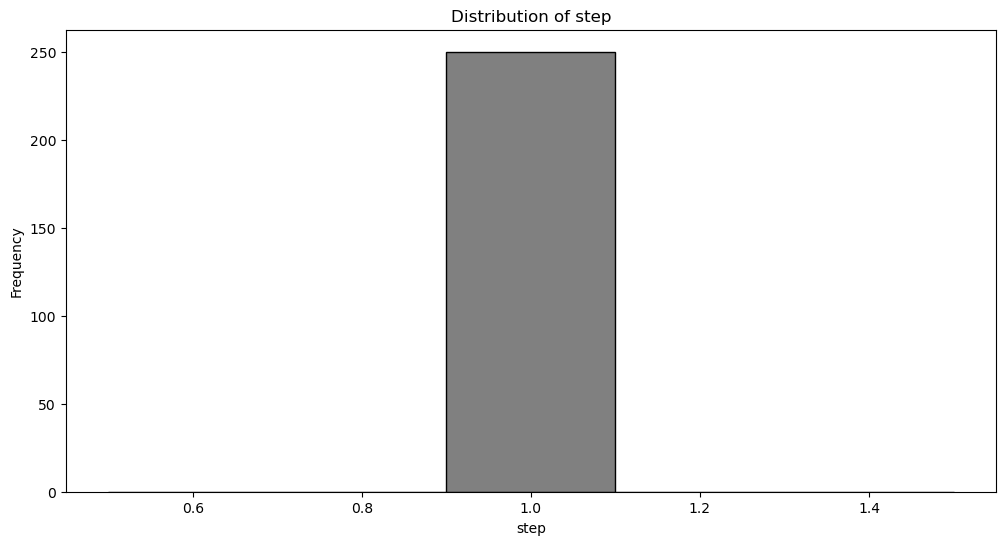

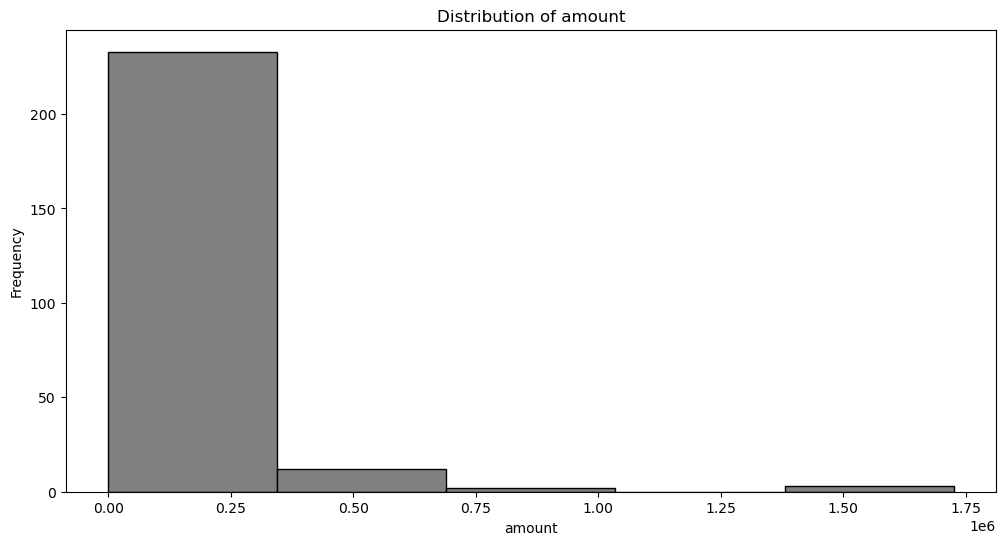

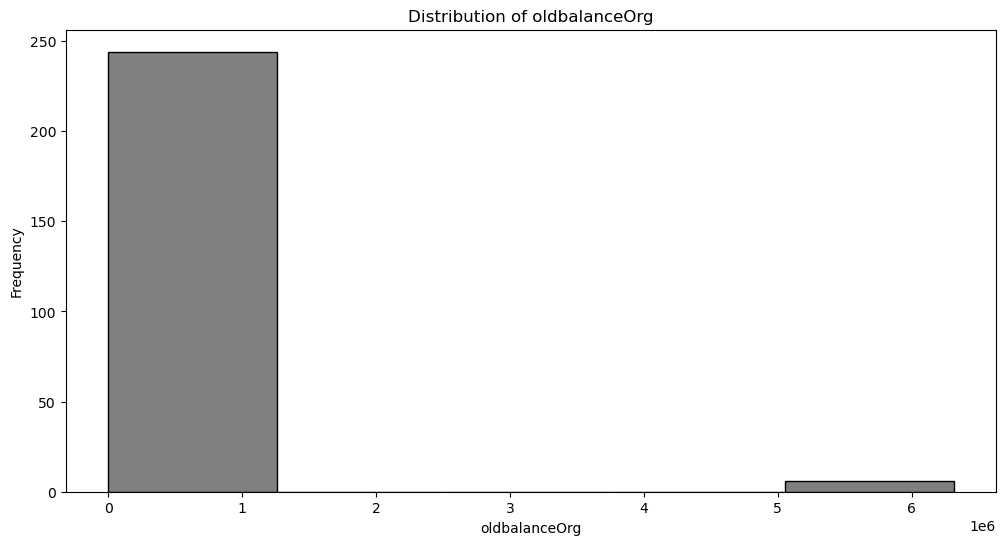

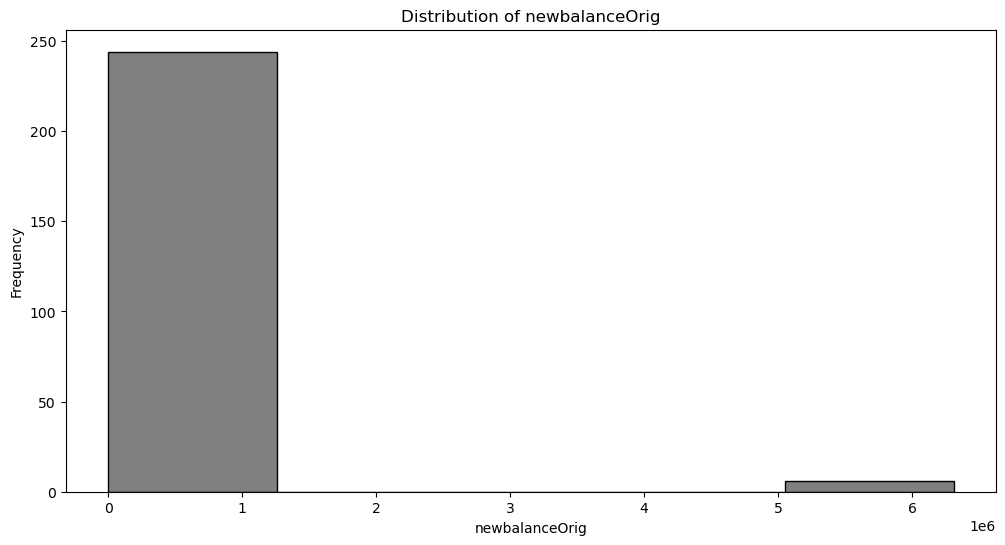

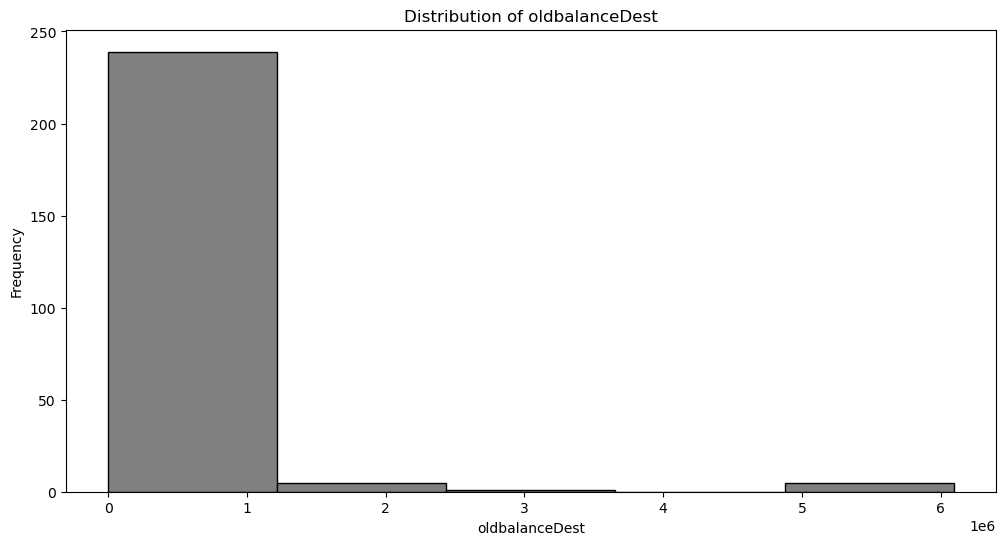

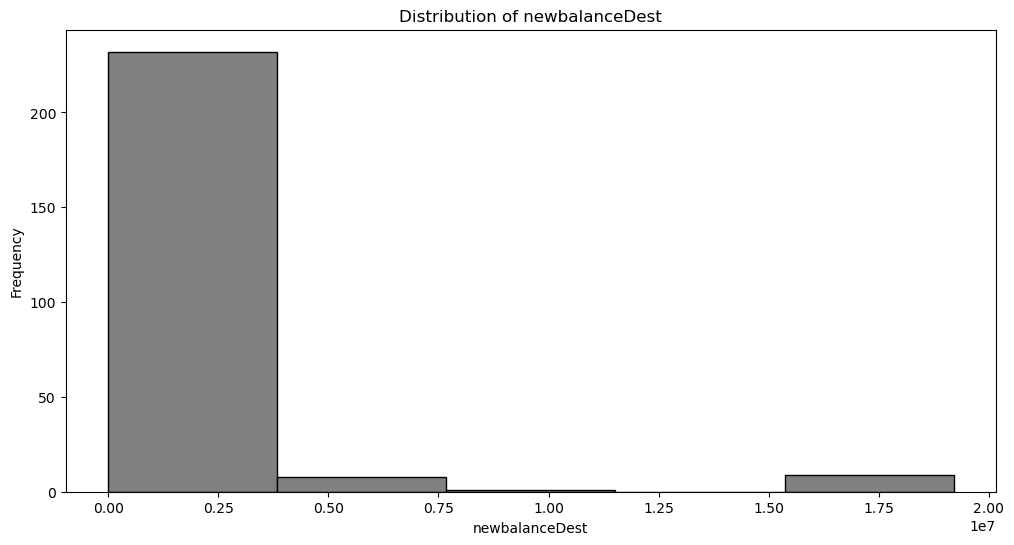

In [25]:
#histogram
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

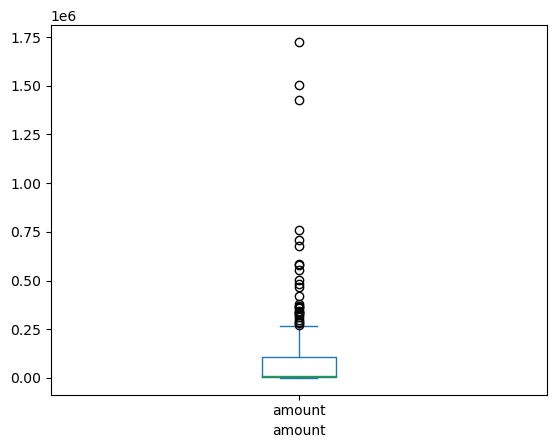

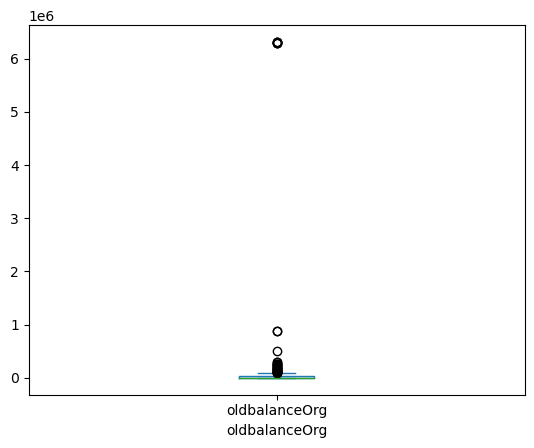

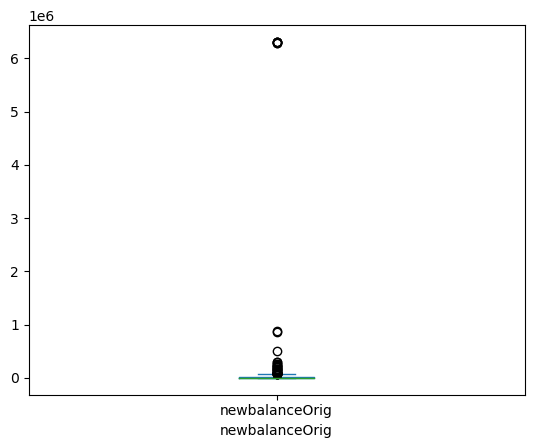

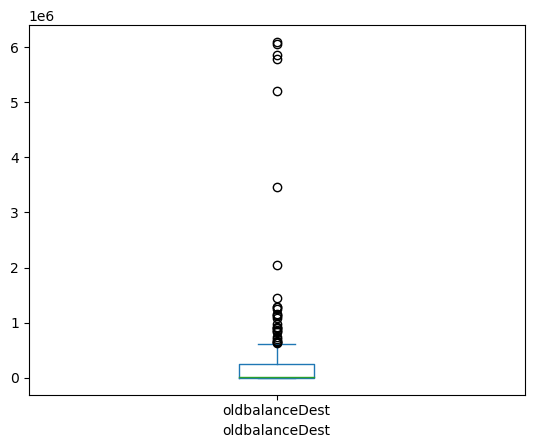

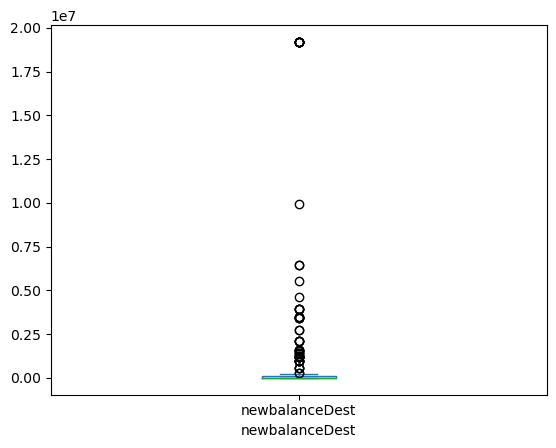

In [26]:
#Boxplot
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

In [27]:
#Finding outliers
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))
    print('\n')

amount
1609.5580000000002
282170.4799999999


oldbalanceOrg
0.0
152109.8


newbalanceOrig
0.0
128498.49799999989


oldbalanceDest
0.0
658963.301


newbalanceDest
0.0
2719172.89




In [28]:
#Removing outliers
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  1.2445989885616426


Feature:  oldbalanceOrg
Skewness value:  1.638543157880508


Feature:  newbalanceOrig
Skewness value:  1.7289877963334357


Feature:  oldbalanceDest
Skewness value:  1.2879434064192847


Feature:  newbalanceDest
Skewness value:  1.8297164606679281




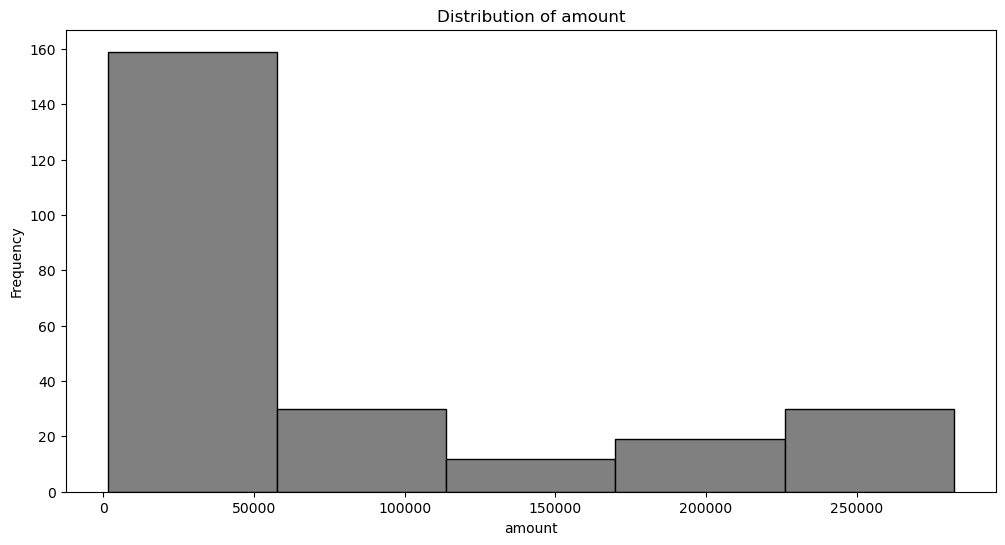

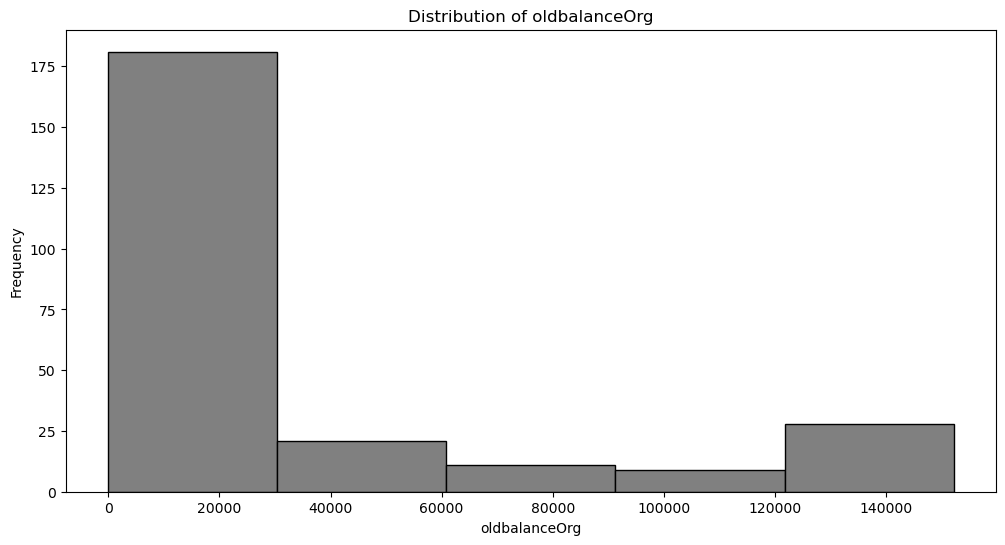

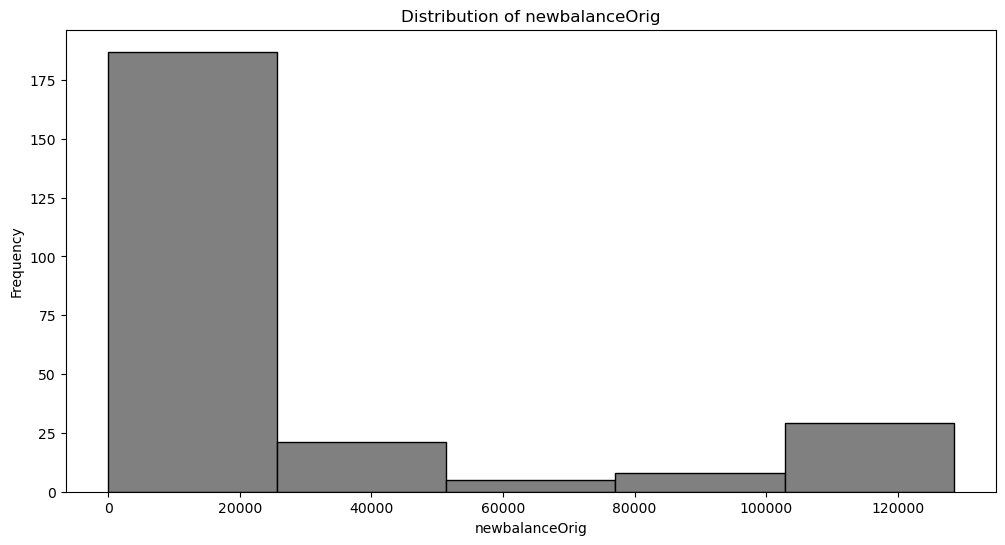

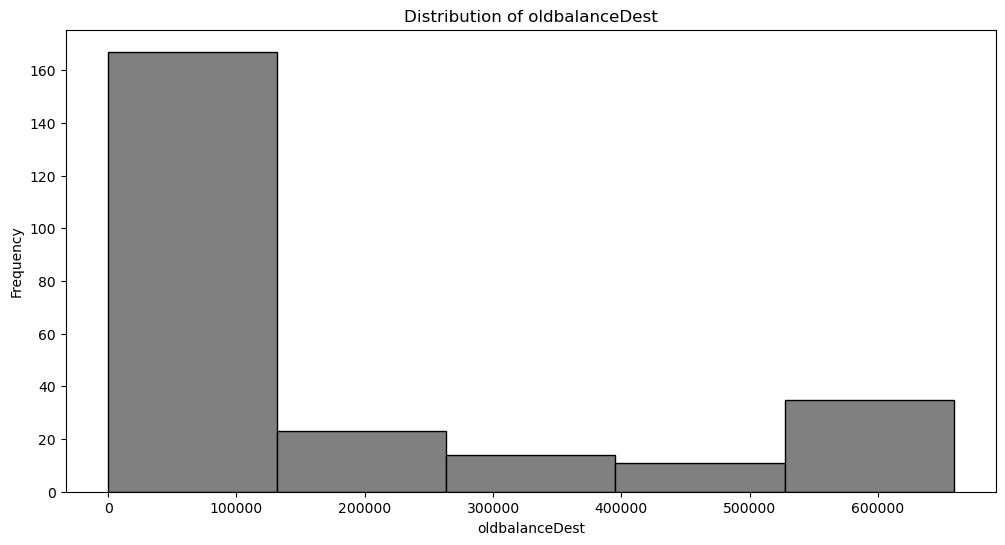

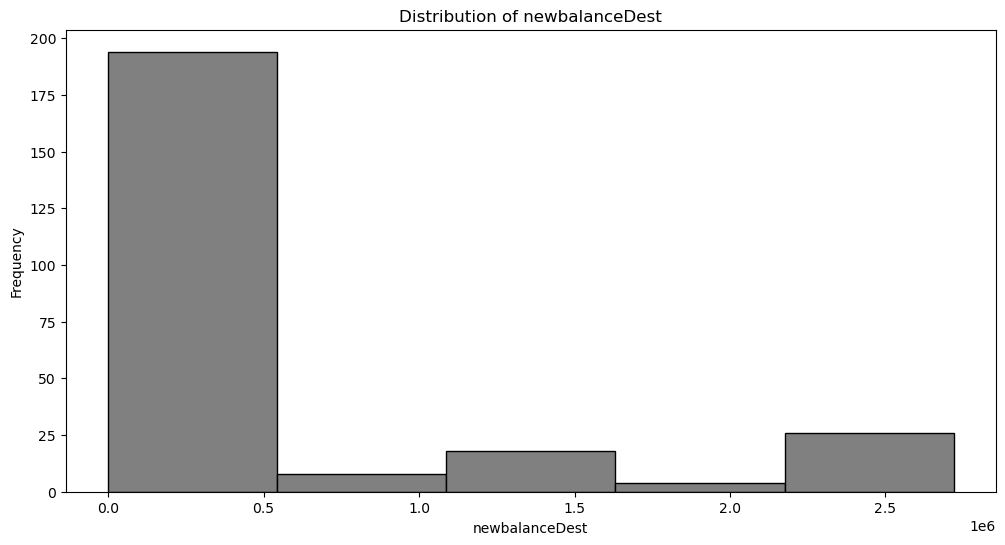

In [29]:
#Histogram after removing outliers
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()


In [30]:
#Univariate visualization

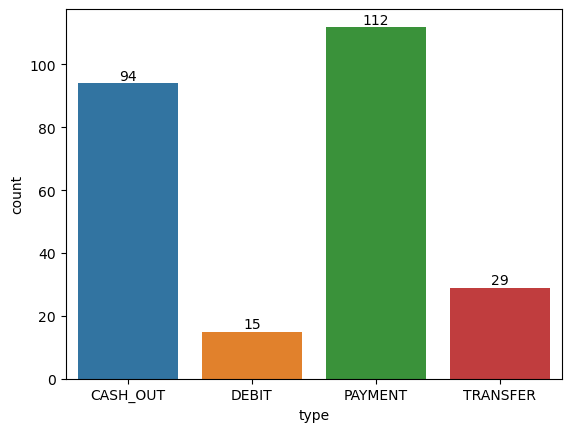

In [31]:
#Barchart
i = sns.countplot(x='type',data=df)

for bars in i.containers:
     i.bar_label(bars)

PAYMENT     112
CASH_OUT     94
TRANSFER     29
DEBIT        15
Name: type, dtype: int64


<Axes: >

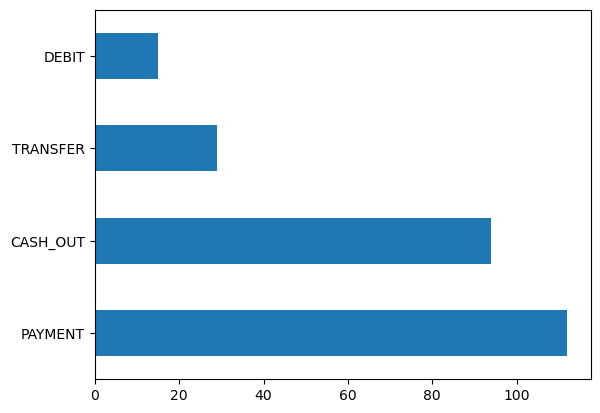

In [32]:
#Barchart for Type :Method 2
df.type
df.type.unique()
payment = df.type.value_counts()
print(payment)
payment.plot(kind='barh')


In [33]:
#Grouped Bar chart-Type v/s isFraud
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud     0  1
type            
CASH_OUT   93  1
DEBIT      15  0
PAYMENT   112  0
TRANSFER   28  1

<Axes: xlabel='type'>

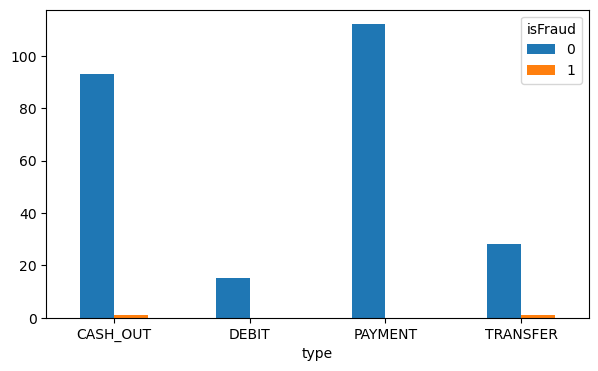

In [34]:
#Grouped bar chart between TYPE and ISFRAUD
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

(0.0, 500.0)

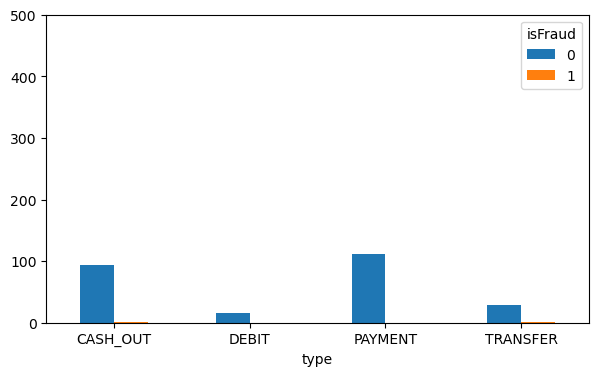

In [35]:
# by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([0,500])


<Axes: xlabel='type'>

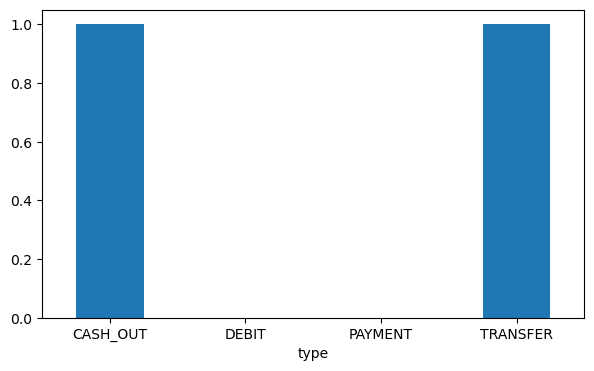

In [36]:
#with maximizing-showing fraud
CrosstabResult[1].plot.bar(figsize=(7,4), rot=0)

Minimum:  1609.5580000000002
Maximum:  282170.4799999999


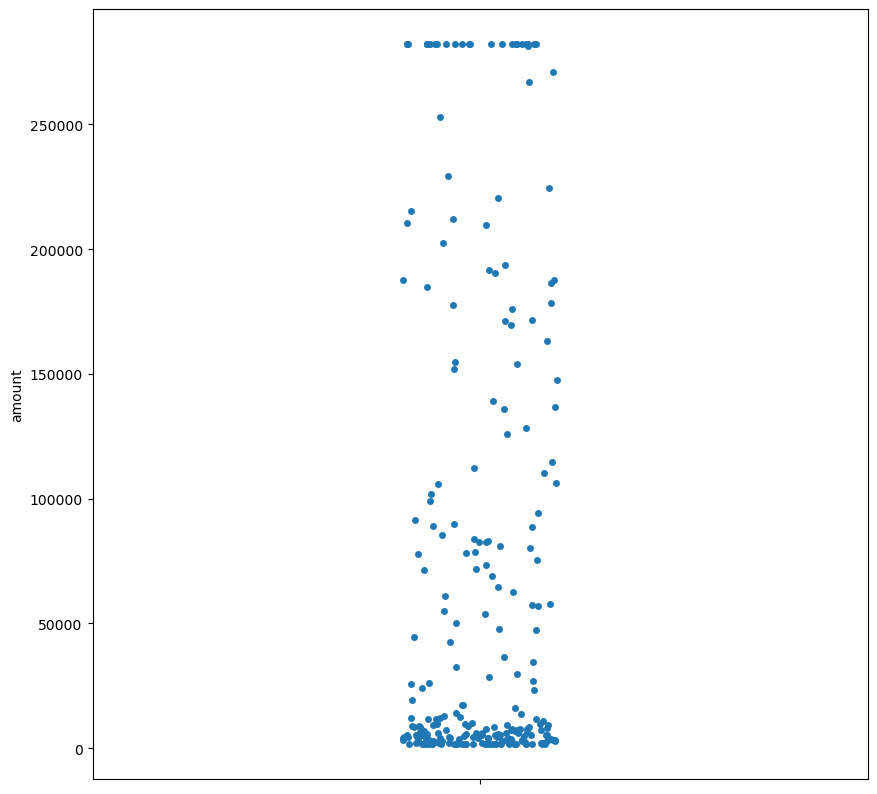

In [37]:
#stripplot for amnt
df.amount
plt.figure(figsize=(10,10))
sns.stripplot(y=df.amount)
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

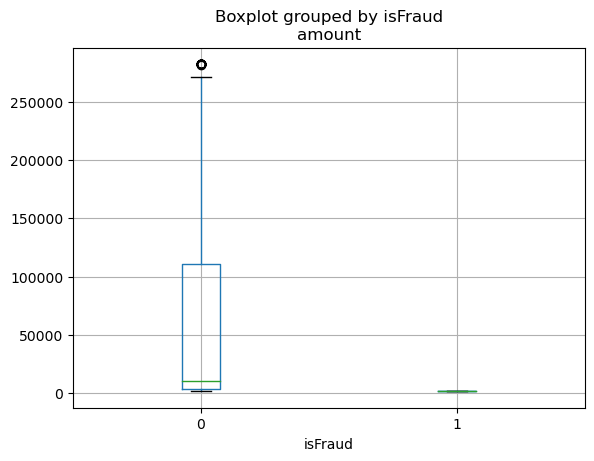

In [38]:
df.boxplot(column='amount', by='isFraud')

<Axes: xlabel='amount', ylabel='Density'>

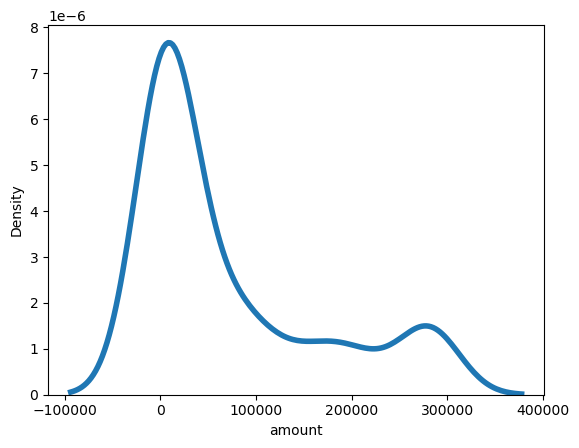

In [39]:
sns.kdeplot(df['amount'], linewidth=4)    

In [40]:
#Pie chart of a categorical column-type
import plotly.express as px

type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

In [41]:
#Bivariates visualization

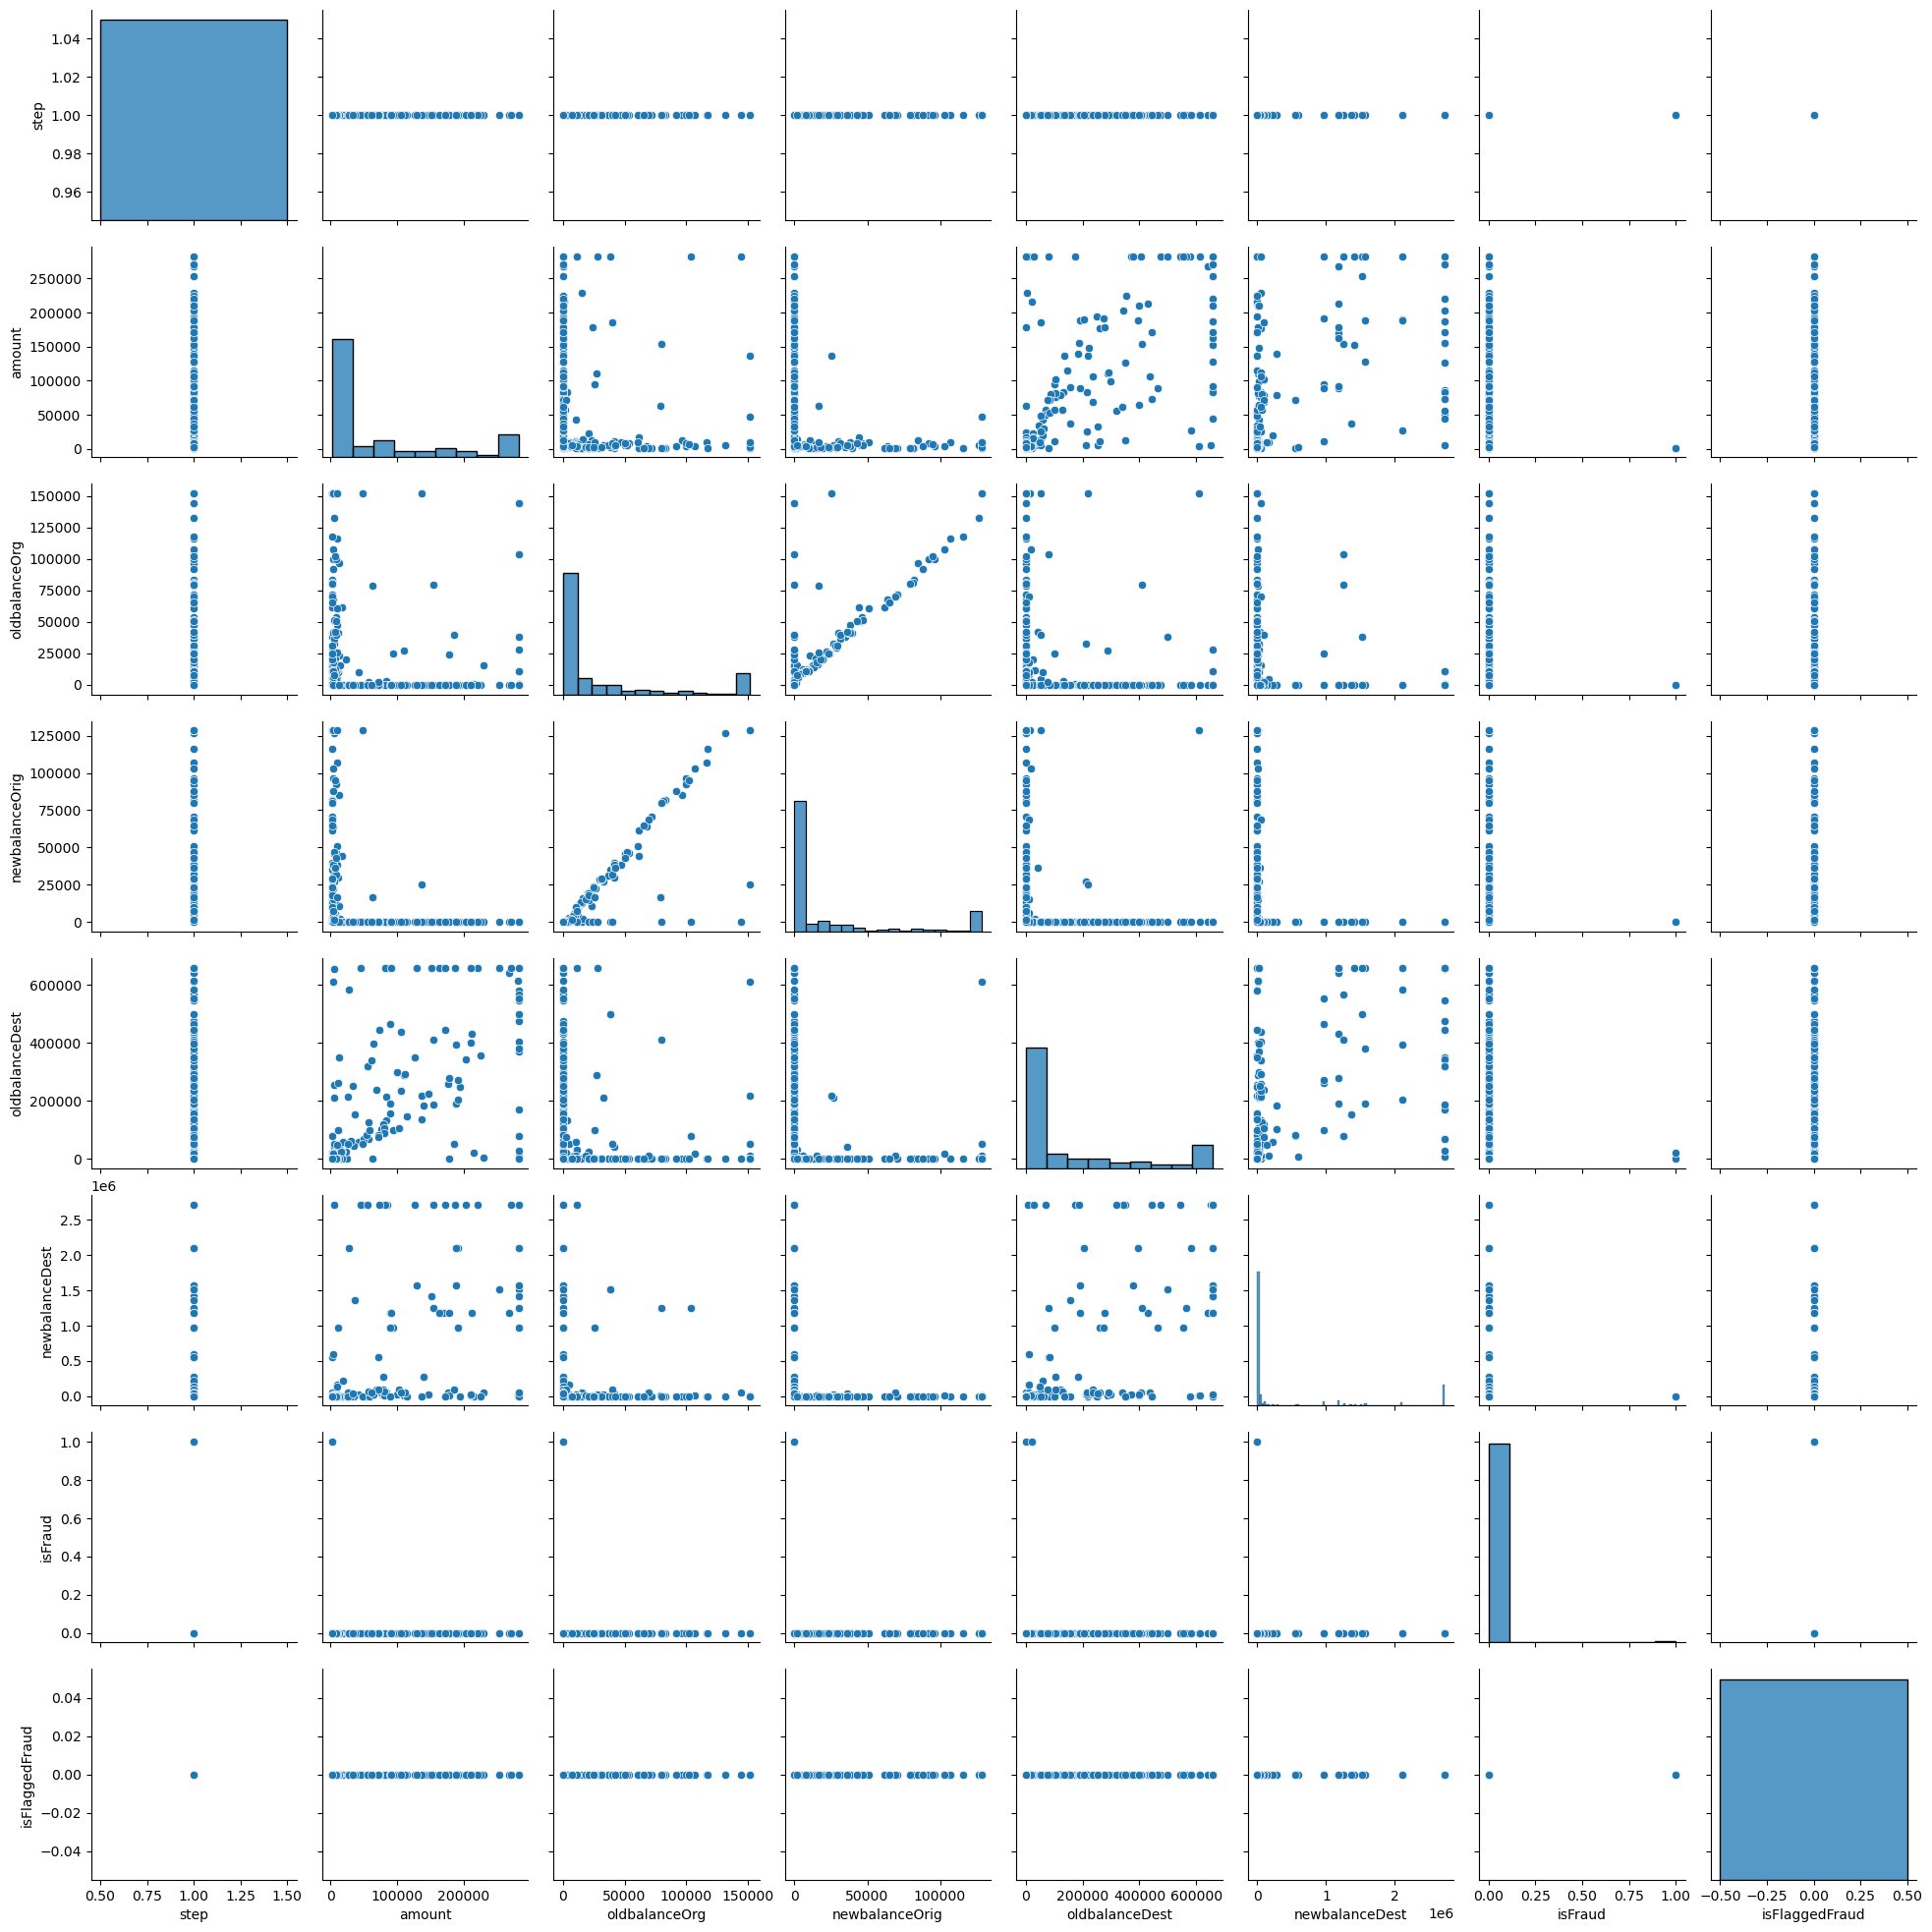

In [42]:
# Plot a pair plot
sns.pairplot(df)
plt.show()

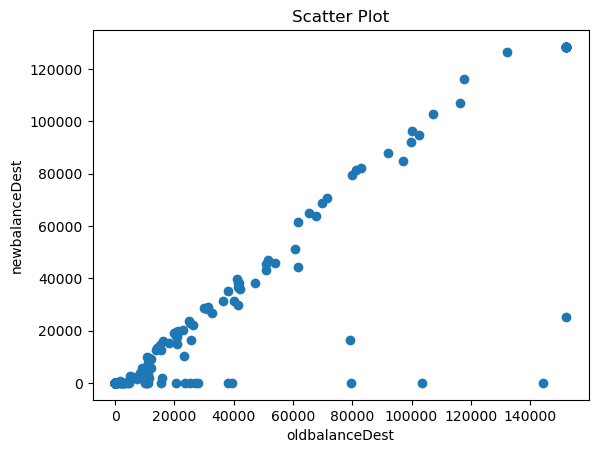

In [43]:
# Create a scatter plot of two numerical columns
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'])
plt.xlabel('oldbalanceDest')
plt.ylabel('newbalanceDest')
plt.title('Scatter Plot')
plt.show()

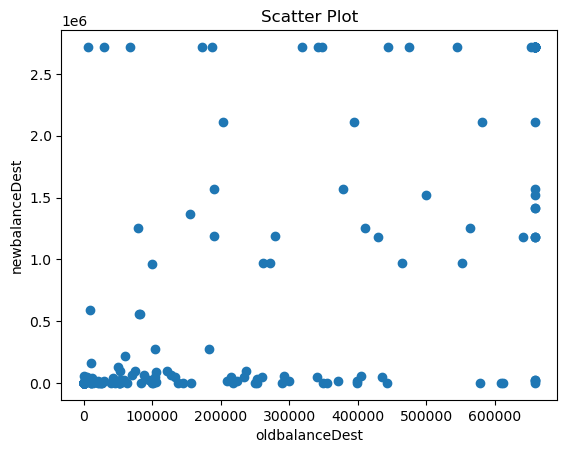

In [44]:
# Create a scatter plot of two numerical columns
plt.scatter(df['oldbalanceDest'], df['newbalanceDest'])
plt.xlabel('oldbalanceDest')
plt.ylabel('newbalanceDest')
plt.title('Scatter Plot')
plt.show()

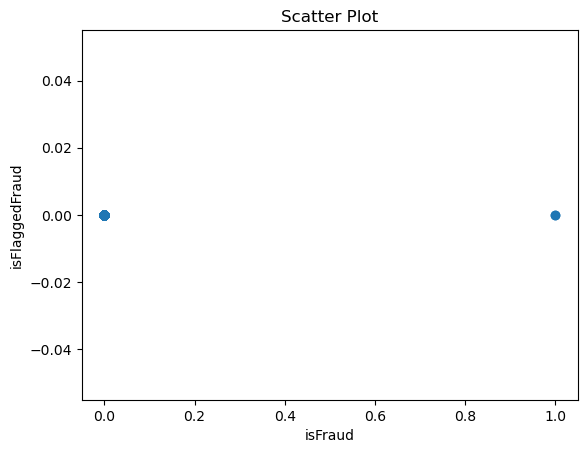

In [45]:
# Create a scatter plot of two numerical columns
plt.scatter(df['isFraud'], df['isFlaggedFraud'])
plt.xlabel('isFraud')
plt.ylabel('isFlaggedFraud')
plt.title('Scatter Plot')
plt.show()

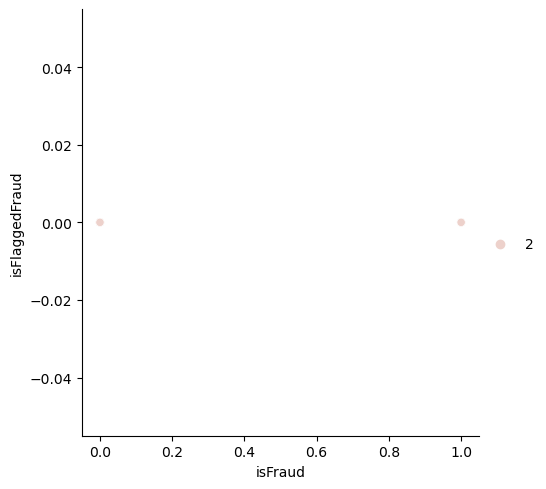

In [46]:
#relation/scatterplot
sns.relplot(x='isFraud',y='isFlaggedFraud',hue=2,data=df)

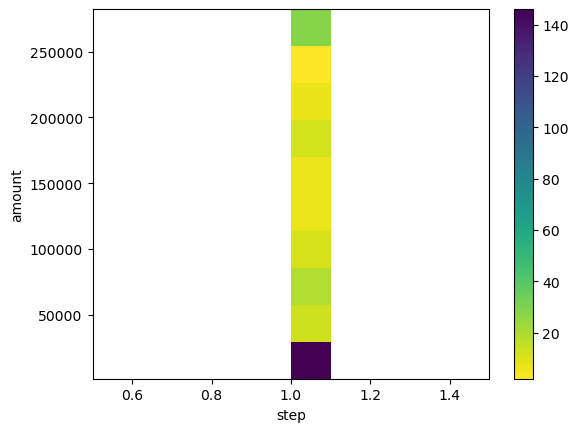

In [47]:
plt.hist2d(data= df, x = 'step', y = 'amount', cmin = 0.5,
    cmap = 'viridis_r' )
plt.colorbar()
plt.xlabel('step')
plt.ylabel('amount')
plt.show()

In [48]:
#Multivariates Visualization

In [49]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
step             NaN       NaN            NaN             NaN             NaN   
amount           NaN  1.000000      -0.293455       -0.378599        0.729766   
oldbalanceOrg    NaN -0.293455       1.000000        0.947165       -0.336746   
newbalanceOrig   NaN -0.378599       0.947165        1.000000       -0.343527   
oldbalanceDest   NaN  0.729766      -0.336746       -0.343527        1.000000   
newbalanceDest   NaN  0.584663      -0.276716       -0.283636        0.673837   
isFraud          NaN -0.065174      -0.055204       -0.050523       -0.057445   
isFlaggedFraud   NaN       NaN            NaN             NaN             NaN   

                newbalanceDest   isFraud  isFlaggedFraud  
step                       NaN       NaN             NaN  
amount                0.584663 -0.065174             NaN  
oldbalanceOrg        -0.276716 -0.055204             NaN  
newbalanceOrig       -0.283636 -0.050523             NaN  
oldbalanceDest        0.673837 -0.057445             NaN  
newbalanceDest        1.000000 -0.045378             NaN  
isFraud              -0.045378  1.000000             NaN  
isFlaggedFraud             NaN       NaN             NaN

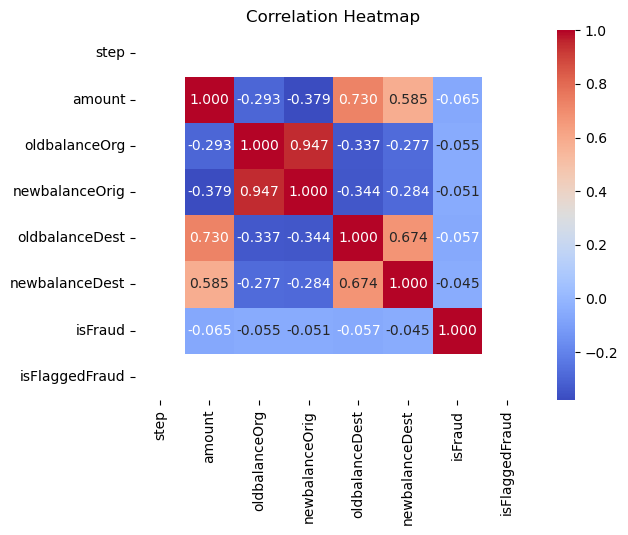

In [50]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns, annot=True,
            cmap='coolwarm',fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

In [51]:
#remove unnecessary column
df.drop(['isFlaggedFraud'],inplace=True,axis=1)

In [52]:
#Label encoding-catogarical to numerical
dmap = {'PAYMENT':1, 'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5}
df['type'] = df['type'].map(dmap)
df.head()

step type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1    1   9839.640       152109.8      128498.498             0.0   
1     1    1   1864.280        21249.0       19384.720             0.0   
2     1    2   1609.558          181.0           0.000             0.0   
3     1    3   1609.558          181.0           0.000         21182.0   
4     1    1  11668.140        41554.0       29885.860             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

In [53]:
#class balance
from sklearn.utils import resample

df_major = df[df.isFraud == 0]
df_minor = df[df.isFraud == 1]
  
# Upsampling minority class
df_minor_sample = resample(df_minor,
                             
                           # Upsample with replacement
                           replace=True,    
                             
                           # Number to match majority class
                           n_samples=len(df_major),   
                           random_state=42)
  
# Combine majority and upsampled minority class
df = pd.concat([df_major, df_minor_sample])
  
# Display count of data points in both class
print(df.isFraud.value_counts())

0    248
1    248
Name: isFraud, dtype: int64


<Axes: title={'center': 'count (target)'}>

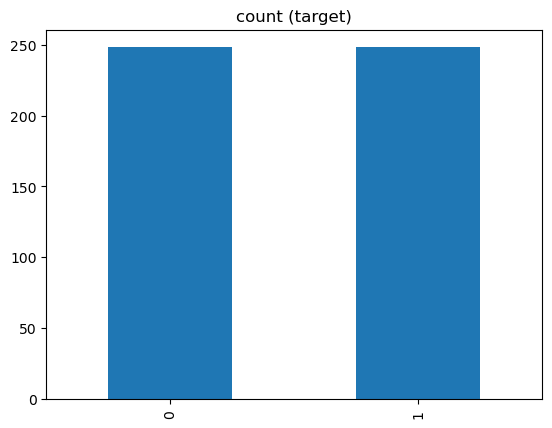

In [54]:
df['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [55]:
df

step type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0      1    1   9839.640       152109.8      128498.498             0.0   
1      1    1   1864.280        21249.0       19384.720             0.0   
4      1    1  11668.140        41554.0       29885.860             0.0   
5      1    1   7817.710        53860.0       46042.290             0.0   
6      1    1   7107.770       152109.8      128498.498             0.0   
..   ...  ...        ...            ...             ...             ...   
2      1    2   1609.558          181.0           0.000             0.0   
2      1    2   1609.558          181.0           0.000             0.0   
3      1    3   1609.558          181.0           0.000         21182.0   
2      1    2   1609.558          181.0           0.000             0.0   
2      1    2   1609.558          181.0           0.000             0.0   

    newbalanceDest  isFraud  
0              0.0        0  
1              0.0        0  
4              0.0        0  
5              0.0        0  
6              0.0        0  
..             ...      ...  
2              0.0        1  
2              0.0        1  
3              0.0        1  
2              0.0        1  
2              0.0        1  

[496 rows x 8 columns]

In [56]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

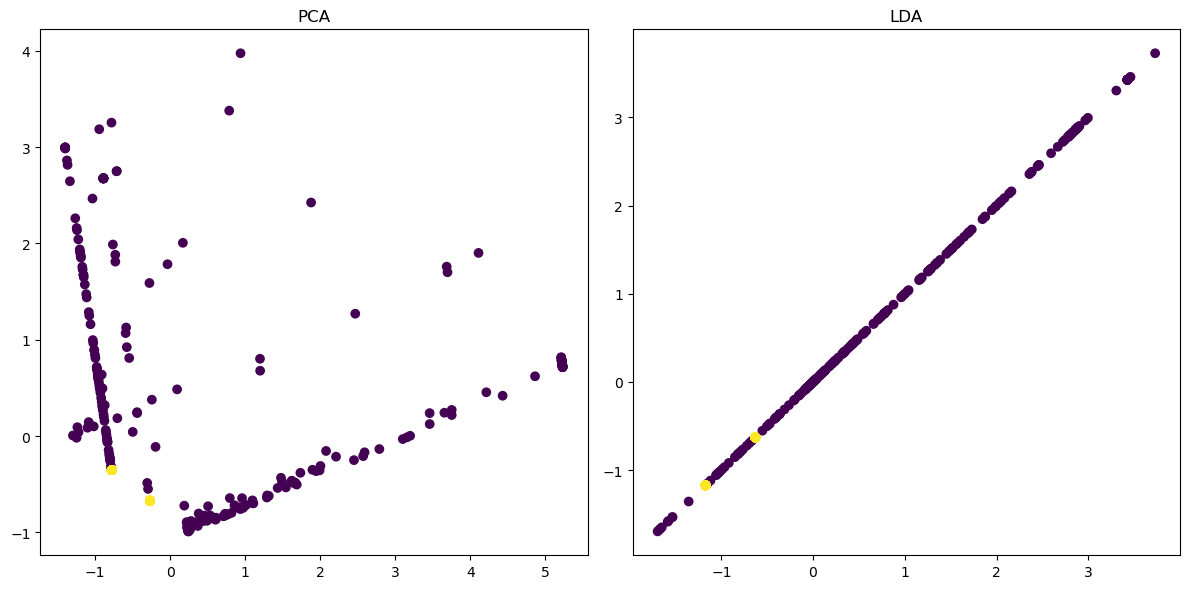

In [57]:
#PCA & LDA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the dataset attributes as an example
X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = df.loc[:,'isFraud'].values

# Standardize the features (optional but recommended for PCA and LDA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)


# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 0], c=y, cmap='viridis')  # Corrected indexing
plt.title('LDA')

plt.tight_layout()
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape,X_test.shape

((396, 4), (100, 4))

In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [64]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [67]:
for name, model in models.items():
    print(f'Training Model: {name} \n')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    
    print('-'*50)


Training Model: LR 

Training Accuracy: 0.9141414141414141
Testing Accuracy: 0.94
Testing Confusion Matrix: 
[[43  6]
 [ 0 51]]
--------------------------------------------------
Training Model: KNN 

Training Accuracy: 0.9924242424242424
Testing Accuracy: 0.99
Testing Confusion Matrix: 
[[48  1]
 [ 0 51]]
--------------------------------------------------
Training Model: DT 

Training Accuracy: 1.0
Testing Accuracy: 0.49
Testing Confusion Matrix: 
[[49  0]
 [51  0]]
--------------------------------------------------
Training Model: RF 

Training Accuracy: 1.0
Testing Accuracy: 0.49
Testing Confusion Matrix: 
[[49  0]
 [51  0]]
--------------------------------------------------
Training Model: Naive Bayes 

Training Accuracy: 1.0
Testing Accuracy: 0.49
Testing Confusion Matrix: 
[[49  0]
 [51  0]]
--------------------------------------------------
Training Model: SVC 

Training Accuracy: 0.9722222222222222
Testing Accuracy: 0.96
Testing Confusion Matrix: 
[[45  4]
 [ 0 51]]
-----------

In [ ]:
svm_model = SVC(kernel='linear', random_state=42, probability=True)  
svm_model.fit(x_train, y_train)

In [ ]:
# Saving the Trained SVM Model (SVM) to a File using Pickle

pickle_out = open("SVC.pkl","wb")
pickle.dump(svm_model, pickle_out)
pickle_out.close()